In [2]:
#S- (P,Q,D) + ARIMA - (p,q,d) -  When you model seasonality also like a seperate time series - SARIMA
#Regression - Est. Next value using some x
#Auto- Reg - Est. Values with the same value as x.

In [ ]:
#AR
#MA - #ARIMA #SARIMA - #SARIMAX
#DEEP LEARNING Techniques - LSTMs - Deep learning classes (Not Now)
#Fb Prophet

In [70]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.0 MB/s eta 0:00:00


In [ ]:
#SARIMAX - SARIMA - (Exogenous X variables as well) SARIMA + XVariables

In [71]:
from pmdarima import auto_arima

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

In [5]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/DailyTotalFemaleBirths.csv", index_col = 'Date', parse_dates = True)
#without Exogenous variables - No X

In [6]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/TradeInventories.csv",index_col = 'Date',parse_dates = True)

In [7]:
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


In [12]:
#1. Null hypothesis and Alternate Hypothesis = P-value P < 0.05 - we have 95% confidence againt the null hypotheses (strong evidence against)
#H0: Null Hypothesis = Series is non-stationary P > 0.05 - Non Stationary
#H1: Alternate hypotheses = Series is Stationary P < 0.05 - Series Stationary

def adf_test(series, title = ''):
  print("Augmented Dicky-Fuller test")
  result = adfuller(series.dropna(),autolag='AIC')
  dfout = pd.Series(result[0:4], index = ['ADF test statistic','p-vales','#-lags used','# observations'])
  for key,val in result[4].items():
    dfout[f'Critical Values ({key})'] = val

  if result[1] <= 0.05:
    print("Strong evidence against the null hypotheses")
    print("Reject the null hypothesis")
    print("Data is stationary")

  else:
    print("Weak evidence against the null hypotheses")
    print("Fail to Reject the null hypothesis")
    print("Data is non-stationary")

<Axes: xlabel='Date'>

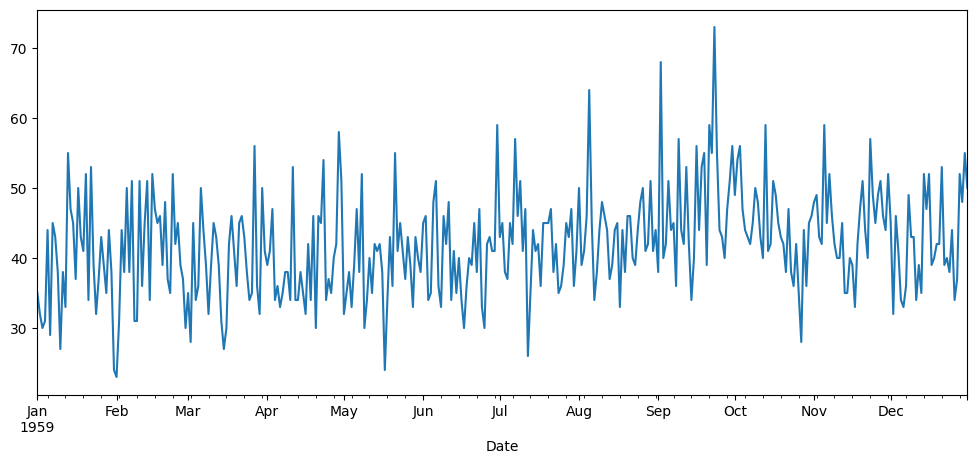

In [14]:
df1['Births'].plot(figsize = (12,5))

In [15]:
adf_test(df1['Births'])

Augmented Dicky-Fuller test
Strong evidence against the null hypotheses
Reject the null hypothesis
Data is stationary


In [17]:
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [16]:
df1.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [83]:
train = df1.iloc[:90]
test = df1.iloc[90:]

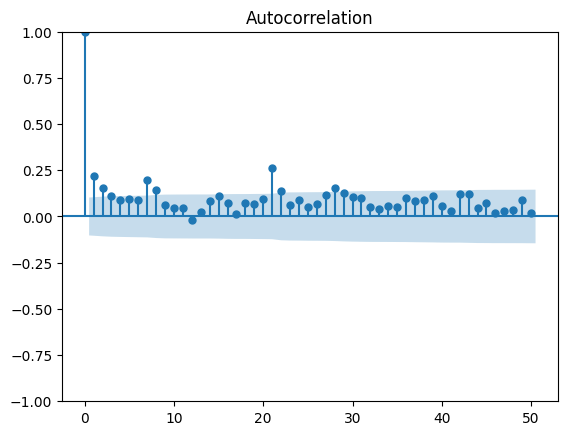

In [20]:
lags = 50
plot_acf(df1,lags = lags);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


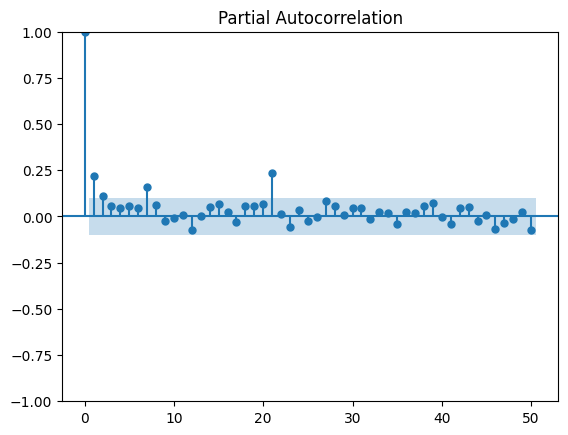

In [21]:
lags = 50
plot_pacf(df1,lags = lags);

In [18]:
#Finding values manually with PACF and ACF is not easy and we use Auto-ARIMA
#AUTO-Arima - Anaylizes your data and gives values for p,d,q - P,D,Q = Automatically
#Grid Search

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model = ARIMA(train['Births'],order = (2,0,2))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Sat, 24 Jun 2023   AIC                            627.625
Time:                        04:54:26   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.091      0.000      37.764      41.750
ar.L1         -0.4654      1.003     -0.464      0.643      -2.431       1.501
ar.L2          0.5086      0.940      0.541      0.589      -1.334       2.351
ma.L1          0.5613     11.784      0.048      0.962     -22.535      23.657
ma.L2         -0.4385      5.086     -0.086      0.931     -10.407       9.530
sigma2        54.3790    623.600      0.087      0.931   -1167.855    1276.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start = len(train)
end = len(train)+len(test)-1
prediction = results.predict(start = start,end = end).rename("ARMA (2,2) predictions")

<Axes: xlabel='Date'>

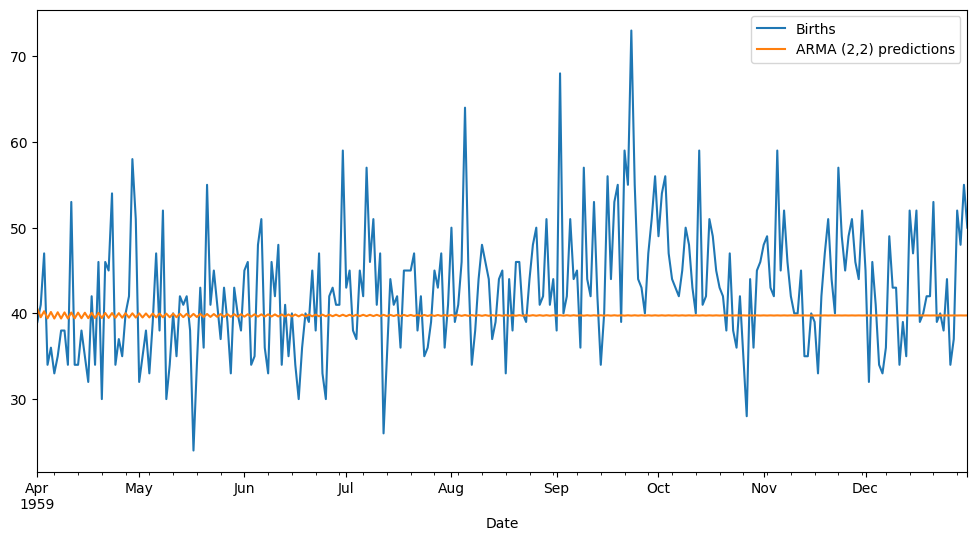

In [34]:
test['Births'].plot(legend = True,figsize = (12,6))
prediction.plot(legend = True)

In [80]:
#Auto ARIMA
auto_arima(df1['Births'],seasonality = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sat, 24 Jun 2023   AIC                           2459.074
Time:                        05:49:42   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
#Auto ARIMA
auto_arima(df1['Births'],seasonality = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sat, 24 Jun 2023   AIC                           2459.074
Time:                        05:50:28   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model = ARIMA(train['Births'],order = (1,1,1))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.284
Date:                Sat, 24 Jun 2023   AIC                            620.568
Time:                        05:51:50   BIC                            628.034
Sample:                    01-01-1959   HQIC                           623.578
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0968      0.114      0.850      0.396      -0.126       0.320
ma.L1         -0.9997      5.737     -0.174      0.862     -12.244      10.244
sigma2        55.6606    316.917      0.176      0.861    -565.485     676.806
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.79   Prob(JB):                         0.38
Heteroskedasticity (H):               0.78   Skew:                             0.21
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
start = len(train)
end = len(train)+len(test)-1
prediction = results.predict(start = start,end = end).rename("ARIMA (1,1,1) predictions")

<Axes: xlabel='Date'>

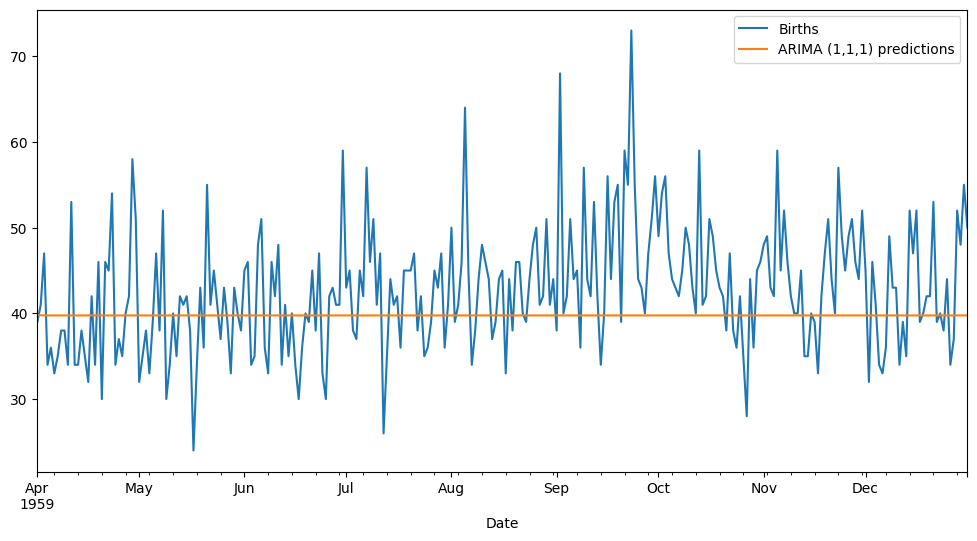

In [87]:
test['Births'].plot(legend = True,figsize = (12,6))
prediction.plot(legend = True)

In [89]:
print("The RMSE is:",rmse(test['Births'],prediction))

The RMSE is: 7.7373033609889355


In [ ]:
#ARIMA - different values for p,d,q - HW

<Axes: xlabel='Date'>

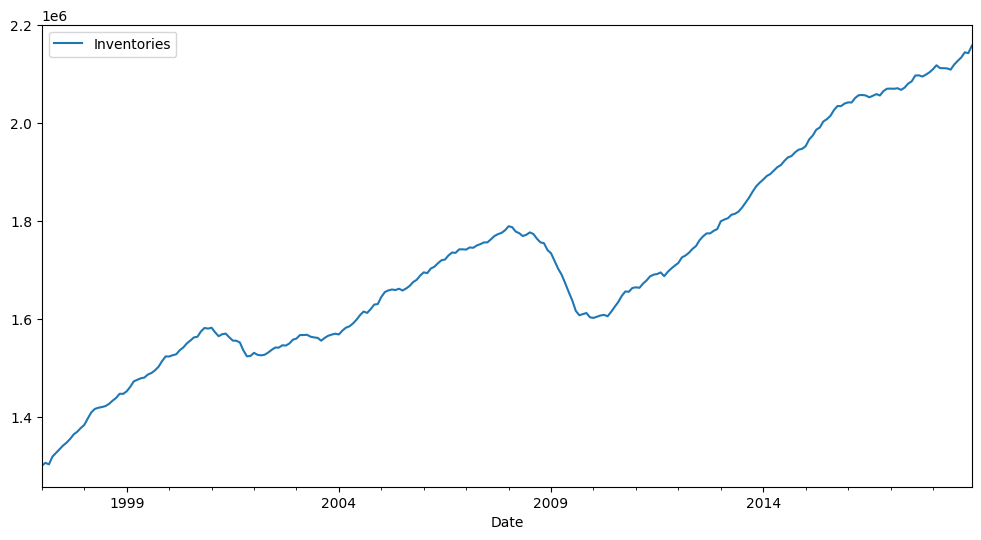

In [35]:
df2.plot(figsize = (12,6))

In [36]:
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['Inventories'], model = 'multiplicative')

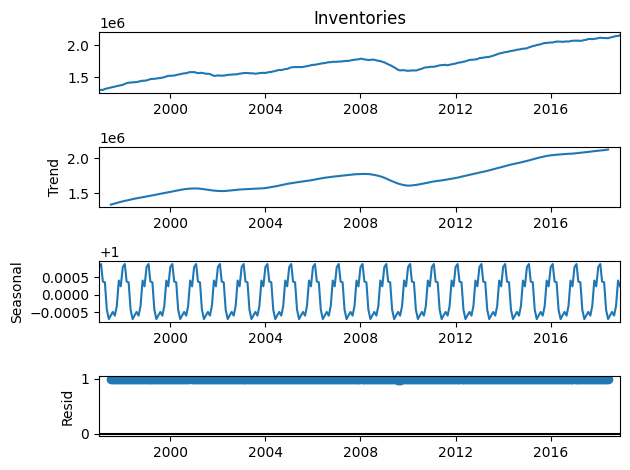

In [39]:
result.plot();

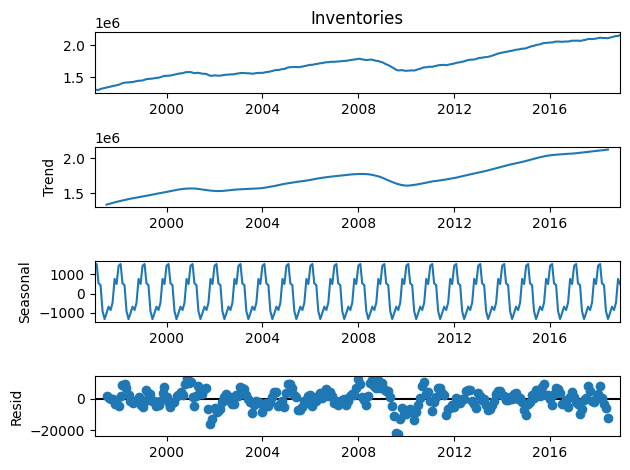

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['Inventories'], model = 'additive')
result.plot();

In [44]:
adf_test(df2['Inventories'])

Augmented Dicky-Fuller test
Weak evidence against the null hypotheses
Fail to Reject the null hypothesis
Data is non-stationary


In [45]:
from statsmodels.tsa.statespace.tools import diff

In [47]:
df2['d1'] = diff(df2['Inventories'], k_diff = 1)


In [48]:
adf_test(df2['d1'])

Augmented Dicky-Fuller test
Strong evidence against the null hypotheses
Reject the null hypothesis
Data is stationary


In [ ]:
#(p,d,q) - (,1,)

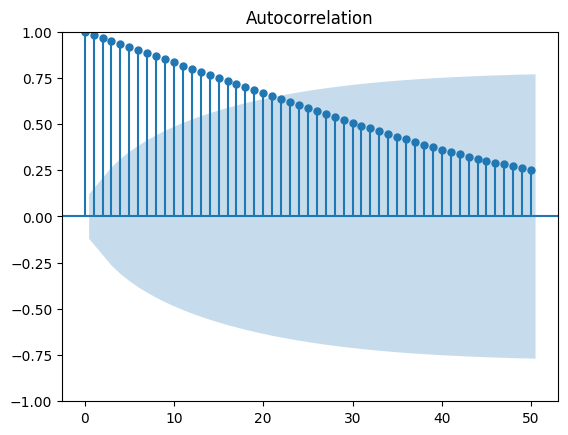

In [50]:
lags = 50
plot_acf(df2['Inventories'],lags = lags);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


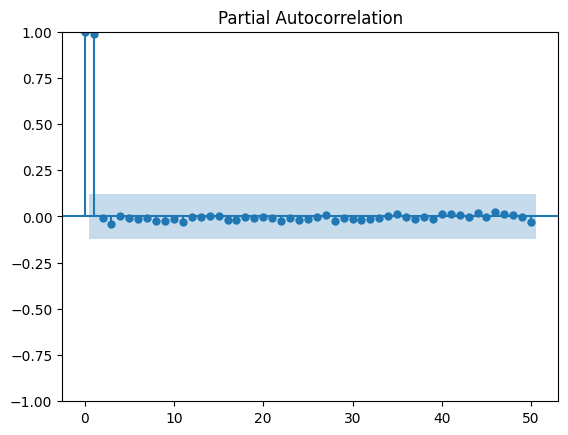

In [51]:
lags = 50
plot_pacf(df2['Inventories'],lags = lags);

In [ ]:
#(p,d,q) - (2,1,0)
#Finish ARIMA for both the problems
#Try with different values for pdq as well

In [54]:
df2.head(20)

,Inventories,d1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
1997-06-01,1334688,7394.0
1997-07-01,1342310,7622.0
1997-08-01,1348243,5933.0
1997-09-01,1355839,7596.0


In [55]:
df2.tail(12)

,Inventories,d1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


In [72]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [73]:
model = ARIMA(train['Inventories'],order = (2,1,0))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2610.819
Date:                Sat, 24 Jun 2023   AIC                           5227.639
Time:                        05:46:23   BIC                           5238.215
Sample:                    01-01-1997   HQIC                          5231.895
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0099      0.003      3.188      0.001       0.004       0.016
ar.L2          0.0020      0.004      0.549      0.583      -0.005       0.009
sigma2      2.542e+07   1.21e-12   2.09e+19      0.000    2.54e+07    2.54e+07
===================================================================================
Ljung-Box (L1) (Q):                  84.62   Jarque-Bera (JB):                94.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -1.16
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.75e+33. Standard errors may be unstable.
"""

In [74]:
start = len(train)
end = len(train)+len(test)-1
prediction = results.predict(start = start,end = end).rename("ARIMA (2,1,0) predictions")

In [75]:
predictions = results.predict(start = start, end = end).rename("ARIMA(2,1,0)")

<Axes: xlabel='Date'>

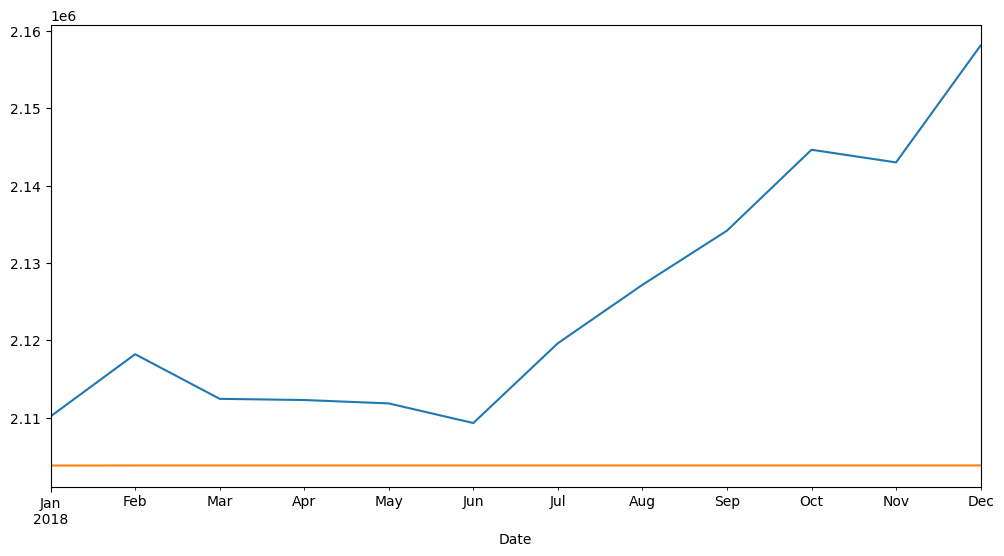

In [76]:
test['Inventories'].plot(figsize = (12,6))
predictions.plot(figsize = (12,6))

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
from statsmodels.tools.eval_measures import rmse

In [91]:
#Auto ARIMA
auto_arima(df2['Inventories'],start_p=0,start_q =0,max_p = 2,max_q =2,stepwise = True,seasonality = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 24 Jun 2023   AIC                           5348.037
Time:                        05:55:54   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
#Auto ARIMA
auto_arima(df2['Inventories']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 24 Jun 2023   AIC                           5348.037
Time:                        05:57:13   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train['Inventories'],order = (0,1,0))
results = model.fit()
results.summary()

In [ ]:
#SARIMA - AUTO-ARIMA